In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
from scipy import stats
import random
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
import pylab as py

# Question 1

In [2]:
airport = pd.read_csv('/Users/mtjen/Desktop/313/data/airport_routes.csv')
movie = pd.read_csv('/Users/mtjen/Desktop/313/data/movie_votes.csv')

### Airport

In [3]:
def get_alpha(values):
    minVal = min(values)
    sumVals = 0
    for value in values:
        equationVal = math.log(value / minVal)
        sumVals += equationVal
        
    alpha = 1 + len(values) * (sumVals ** -1)
    return alpha

In [4]:
def create_powerlaw(alpha, x_min, num_vals):
    data = []
    for x in range(x_min, num_vals):
        valueOne = ((alpha - 1) / x_min)
        valueTwo = ((x / x_min)**(-alpha))
        test = valueOne * valueTwo
        data.append(test)
    return data

In [5]:
airportAlpha = get_alpha(airport['NumberOfRoutes'])
movieAlpha = get_alpha(movie['AverageVote'])

In [6]:
airportAlpha = airportAlpha
movieMean = movie['AverageVote'].mean()
movieSd = movie['AverageVote'].std()

In [7]:
powerArray = create_powerlaw(airportAlpha, min(airport['NumberOfRoutes']), 
                             len(airport['NumberOfRoutes']))

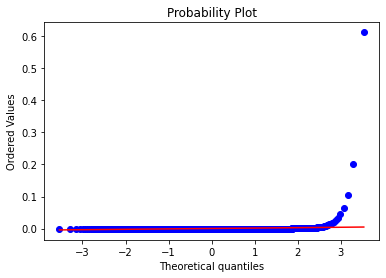

In [8]:
npPowerArray = np.asarray(powerArray)
  
stats.probplot(npPowerArray, dist="norm", plot=py)
py.show()

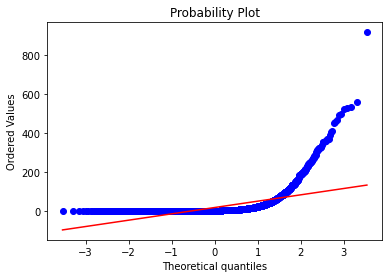

In [9]:
stats.probplot(airport['NumberOfRoutes'], dist="norm", plot=py)
py.show()

### Movies

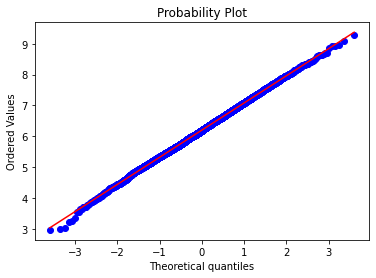

In [10]:
npNormalArray = np.random.normal(loc = movieMean, scale = movieSd, 
                                size = len(movie['AverageVote']))
    
stats.probplot(npNormalArray, dist="norm", plot=py)
py.show()

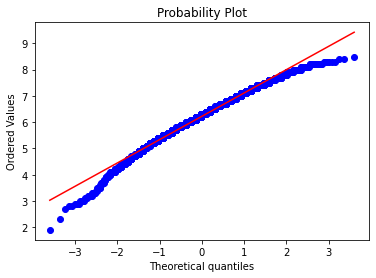

In [11]:
stats.probplot(movie['AverageVote'], dist="norm", plot=py)
py.show()

# Question 2

In [12]:
random.seed(12345)

# method to create array and add variable 1001 to the end
def create_array():
    row = np.random.normal(size = 1000)
    indices = [33, 261, 425, 768, 902]
    valSum = 0

    for index in indices:
        val = row[index - 1]
        valSum += val

    binaryVal = 0
    if valSum > 0:
        binaryVal = 1

    row = np.append(row, binaryVal)
    
    return row

## Part A

In [13]:
cols = []
for x in range(1, 1002):
    cols.append(x)

matrix = pd.DataFrame(columns = cols)

for x in range(100):
    row = create_array()
    matrix.loc[len(matrix)] = row

In [14]:
matrix

,1,2,3,4,5,6,7,8,9,10,...,992,993,994,995,996,997,998,999,1000,1001
0,-1.820574,-0.161934,-0.836605,0.560427,2.225806,-0.948404,0.232827,-2.014057,-0.040947,0.636819,...,0.044161,0.257568,0.004265,0.315187,0.248486,1.169980,1.624615,0.882794,0.676579,1.0
1,-2.168567,-1.522905,-0.672471,-0.204605,0.375569,0.823393,-1.705884,-0.512045,-1.032806,-0.545702,...,-1.804445,0.164371,0.360257,0.873887,1.332190,1.674094,-1.340113,0.764003,-0.282629,1.0
2,0.285139,1.089099,0.679973,1.058045,-0.159461,0.344833,1.779917,0.899183,1.282804,-0.829985,...,-0.046940,0.119791,1.281080,-0.649856,-0.072918,0.238904,-0.303152,-1.071842,1.479996,1.0
3,1.338043,-0.231608,-0.066111,1.629404,0.138391,1.069031,0.721784,-0.362212,-0.534417,0.939864,...,-0.072959,0.674939,0.676880,-0.659676,0.784170,-2.351714,-1.385153,-1.750682,-0.691821,1.0
4,0.675339,-0.206290,0.487318,0.756706,-0.987439,-0.234319,-1.026436,0.714506,-0.225010,-0.379645,...,-0.925546,0.448687,-0.415461,1.576352,-0.073867,1.302371,1.073331,-0.124939,-0.053038,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.657285,0.421634,-0.462281,-2.580625,0.909147,1.249400,-0.149252,-1.918095,0.657948,-0.390556,...,-0.670385,-1.569772,0.105842,-0.216658,0.685190,1.892674,1.491368,0.791619,-0.943426,1.0
96,0.243110,-0.736697,-0.585923,2.016782,0.739179,-0.142395,0.220132,1.005049,-0.280124,0.541123,...,-0.139377,0.586945,-1.051281,-0.910841,-0.633364,-1.347988,-0.476413,0.213393,0.370872,1.0
97,0.408597,-0.567052,0.338543,0.948314,-0.316637,0.810945,-0.023081,0.489188,-0.754011,-0.324393,...,0.393361,0.453228,0.084466,0.172908,0.874836,0.016585,1.483632,0.074860,0.909595,0.0
98,-1.418411,1.122016,0.620961,-1.038914,0.465101,-0.379057,0.094933,-0.968414,0.934910,0.900336,...,0.459491,1.112606,0.537572,-2.356619,0.025328,0.287158,-0.006369,-1.562204,-0.349724,0.0


<AxesSubplot:>

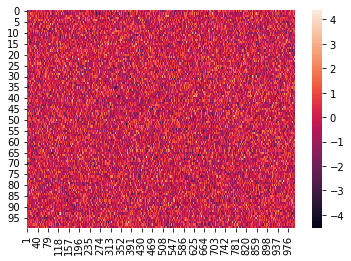

In [15]:
sns.heatmap(matrix)

## Part B

In [16]:
def get_p_value(array_one, array_two):
    result = stats.pointbiserialr(array_one, array_two)
    return result[1]

In [17]:
binaryArray = matrix[1001]
pValues = []

# get p values
for colIndex in range(1, 1001):
    array = matrix[colIndex]
    value = get_p_value(array, binaryArray)
    pValues.append(value)
    
pValues

[0.30967163270580234,
 0.8364980580933407,
 0.7341847536617686,
 0.6546794147680394,
 0.4406953243548314,
 0.14027744030121916,
 0.7772113413600015,
 0.027512970988939685,
 0.9203237084648314,
 0.8405543188220947,
 0.0512938512288061,
 0.3713326710359858,
 0.34323684543082034,
 0.3348294952289707,
 0.2651998085857748,
 0.9623358476102998,
 0.24309586432427532,
 0.32422477466941907,
 0.1377702628119761,
 0.2873565205269441,
 0.7920998090213996,
 0.4298315495298762,
 0.839147949174723,
 0.1545150744588894,
 0.8004830830902824,
 0.1985282887920792,
 0.6738916537366685,
 0.020727378430585846,
 0.9910388931834797,
 0.6790282151560407,
 0.7862440486515848,
 0.23047327206507837,
 1.241967159162111e-05,
 0.5601103531478799,
 0.4845572670284246,
 0.03917410900721957,
 0.3934366149227969,
 0.15301023358438912,
 0.32101442748721537,
 0.2365353448568352,
 0.37022639062711166,
 0.5134672859284416,
 0.18975944427118008,
 0.20055629787477122,
 0.798183060656831,
 0.8934042765929515,
 0.67329560453674

In [18]:
manhattanYs = []

# get manhattan y values
for val in pValues:
    yVal = -1 * math.log(val, 10)
    manhattanYs.append(yVal)

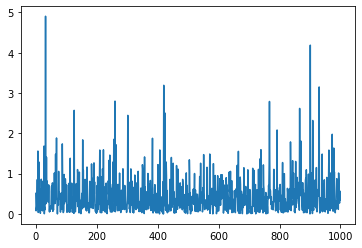

In [19]:
plot.plot(manhattanYs)
plot.show()

### Part C

In [20]:
setCut = 0.01
bonferroniCut = 0.01 / 1000
fdrCut = 0.1

setSigIndices = []
bonferroniSigIndices = []
fdrSigIndices = []

for index in range(len(pValues)):
    value = pValues[index]
    if value < setCut:
        setSigIndices.append(index)
    if value < bonferroniCut:
        bonferroniSigIndices.append(index)
    if value < fdrCut:
        fdrSigIndices.append(index)

In [21]:
print('Number of significant for set variables: {0}'.format(len(setSigIndices)))
setSigIndices # indices + 1 = variable because it is the index of p value array

Number of significant for set variables: 12


[32, 126, 260, 302, 420, 424, 767, 792, 866, 901, 909, 930]

In [22]:
print('Number of significant for bonferroni variables: {0}'.format(len(bonferroniSigIndices)))
bonferroniSigIndices # indices + 1 = variable

Number of significant for bonferroni variables: 0


[]

In [23]:
print('Number of significant for false discovery rate variables: {0}'.format(len(fdrSigIndices)))
fdrSigIndices # indices + 1 = variable

Number of significant for false discovery rate variables: 96


[7,
 10,
 27,
 32,
 35,
 61,
 65,
 68,
 75,
 87,
 113,
 126,
 137,
 143,
 154,
 156,
 168,
 183,
 191,
 210,
 219,
 222,
 240,
 243,
 254,
 256,
 260,
 263,
 275,
 286,
 302,
 312,
 336,
 350,
 351,
 357,
 368,
 383,
 401,
 407,
 420,
 424,
 428,
 445,
 451,
 462,
 467,
 494,
 504,
 505,
 521,
 541,
 551,
 562,
 571,
 583,
 635,
 639,
 661,
 665,
 683,
 696,
 712,
 716,
 731,
 736,
 739,
 747,
 766,
 767,
 768,
 781,
 782,
 792,
 810,
 836,
 843,
 846,
 853,
 866,
 869,
 870,
 888,
 901,
 907,
 909,
 921,
 929,
 930,
 940,
 962,
 968,
 973,
 978,
 980,
 994]

In [25]:
setIndicesSet = set(setSigIndices)
bonferroniIndicesSet = set(bonferroniSigIndices)
fdrIndicesSet = set(fdrSigIndices)

result = bonferroniIndicesSet.intersection(setIndicesSet, fdrIndicesSet)

print('Indices significant in all three cases: {0}'.format(result))

# indices + 1 = variable
print('Variables significant in all three cases: N/A') 

Indices significant in all three cases: set()
Variables significant in all three cases: N/A


In [26]:
# The bonferroni correction threshold is the smallest of the three thresholds, so 
#      if a variable is under the bonferroni threshold, then it will be under both
#      of the other threshold values. In this instance, there aren't any variables 
#      significant in all three cases.

### Part D

In [27]:
thresholdOne = 0.01
thresholdTwo = 0.001
oneIndices = []
twoIndices = []
allValues = []

for x in range(10000):
    randomIndex = random.randint(1, 1000)
    pVal = get_p_value(matrix[randomIndex], matrix[1001])

    allValues.append(pVal)
    
    if pVal < thresholdOne:
        oneIndices.append(randomIndex)
    if pVal < thresholdTwo:
        twoIndices.append(randomIndex)
        
print(len(oneIndices))
print(len(twoIndices))

97
32


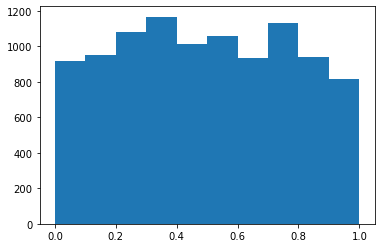

In [28]:
plot.hist(allValues)
plot.show()

In [29]:
print('Number of significant variables for 0.01 threshold: {0}'.format(len(oneIndices)))
oneIndices 

Number of significant variables for 0.01 threshold: 97


[425,
 768,
 902,
 867,
 33,
 425,
 902,
 910,
 303,
 902,
 421,
 768,
 910,
 768,
 768,
 33,
 768,
 867,
 768,
 127,
 261,
 421,
 303,
 902,
 902,
 931,
 867,
 931,
 127,
 910,
 867,
 33,
 261,
 910,
 902,
 902,
 910,
 261,
 421,
 910,
 127,
 303,
 425,
 867,
 33,
 425,
 421,
 768,
 261,
 910,
 768,
 261,
 261,
 421,
 910,
 867,
 33,
 902,
 33,
 768,
 902,
 303,
 127,
 910,
 421,
 425,
 793,
 303,
 793,
 867,
 931,
 425,
 33,
 33,
 793,
 931,
 261,
 33,
 867,
 421,
 421,
 421,
 768,
 303,
 303,
 425,
 303,
 768,
 425,
 768,
 867,
 425,
 902,
 127,
 793,
 867,
 768]

In [30]:
print('Number of significant variables for 0.001 threshold: {0}'.format(len(twoIndices)))
twoIndices 

Number of significant variables for 0.001 threshold: 32


[902,
 33,
 902,
 902,
 421,
 33,
 421,
 902,
 902,
 931,
 931,
 33,
 902,
 902,
 421,
 33,
 421,
 421,
 33,
 902,
 33,
 902,
 421,
 931,
 33,
 33,
 931,
 33,
 421,
 421,
 421,
 902]

In [31]:
# Based on the results from part C, there are 12 variables with significant p values
#     for a threshold of 0.01 (0.012%), so the expected amount that should be
#     significant when permuting 10,000 times is 0.012 * 10,000 = 120. With that, 
#     there is a very high likelihood that there will be some indices randomly
#     chosen that will have significant p values, and the actual result was 97, 
#     which is pretty close to 120 relative to running 10,000 permutation tests.
#     The only variables that were significant of the important 5 are 33 and 902.

### Part E

In [32]:
# We can increase threshold incrementally, so for example from 0.01 to 0.02. This will 
#      theoretically increase the number of variables that aree significant, albeit
#      not as significant as if the threshold was lower

# Question 3

In [41]:
first1000 = matrix.iloc[:,:1000]
first1000

,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
0,-1.820574,-0.161934,-0.836605,0.560427,2.225806,-0.948404,0.232827,-2.014057,-0.040947,0.636819,...,0.317047,0.044161,0.257568,0.004265,0.315187,0.248486,1.169980,1.624615,0.882794,0.676579
1,-2.168567,-1.522905,-0.672471,-0.204605,0.375569,0.823393,-1.705884,-0.512045,-1.032806,-0.545702,...,0.318581,-1.804445,0.164371,0.360257,0.873887,1.332190,1.674094,-1.340113,0.764003,-0.282629
2,0.285139,1.089099,0.679973,1.058045,-0.159461,0.344833,1.779917,0.899183,1.282804,-0.829985,...,-0.867914,-0.046940,0.119791,1.281080,-0.649856,-0.072918,0.238904,-0.303152,-1.071842,1.479996
3,1.338043,-0.231608,-0.066111,1.629404,0.138391,1.069031,0.721784,-0.362212,-0.534417,0.939864,...,-0.690411,-0.072959,0.674939,0.676880,-0.659676,0.784170,-2.351714,-1.385153,-1.750682,-0.691821
4,0.675339,-0.206290,0.487318,0.756706,-0.987439,-0.234319,-1.026436,0.714506,-0.225010,-0.379645,...,-1.533486,-0.925546,0.448687,-0.415461,1.576352,-0.073867,1.302371,1.073331,-0.124939,-0.053038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.657285,0.421634,-0.462281,-2.580625,0.909147,1.249400,-0.149252,-1.918095,0.657948,-0.390556,...,-2.353221,-0.670385,-1.569772,0.105842,-0.216658,0.685190,1.892674,1.491368,0.791619,-0.943426
96,0.243110,-0.736697,-0.585923,2.016782,0.739179,-0.142395,0.220132,1.005049,-0.280124,0.541123,...,0.229230,-0.139377,0.586945,-1.051281,-0.910841,-0.633364,-1.347988,-0.476413,0.213393,0.370872
97,0.408597,-0.567052,0.338543,0.948314,-0.316637,0.810945,-0.023081,0.489188,-0.754011,-0.324393,...,0.078685,0.393361,0.453228,0.084466,0.172908,0.874836,0.016585,1.483632,0.074860,0.909595
98,-1.418411,1.122016,0.620961,-1.038914,0.465101,-0.379057,0.094933,-0.968414,0.934910,0.900336,...,0.479891,0.459491,1.112606,0.537572,-2.356619,0.025328,0.287158,-0.006369,-1.562204,-0.349724


In [42]:
euclidean = euclidean_distances(first1000, first1000)
cosine = cosine_distances(first1000, first1000)

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

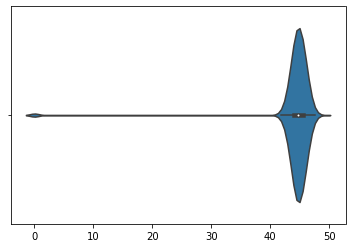

In [43]:
sns.violinplot(euclidean)

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

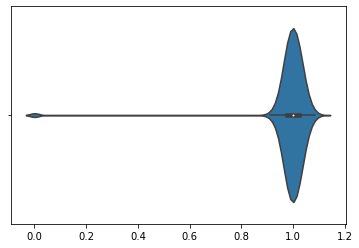

In [44]:
sns.violinplot(cosine)

<AxesSubplot:>

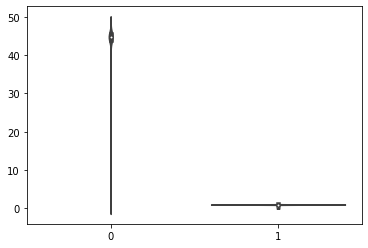

In [45]:
sns.violinplot(data = [euclidean, cosine])

# Question 4

In [46]:
variables = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
means = []
variances = []
mAndV = pd.DataFrame()

for numVars in variables:
    data = matrix.iloc[:,:numVars]
    euclidean = euclidean_distances(data, data)
    means.append(euclidean.mean())
    variances.append(euclidean.var())
    
mAndV['Means'] = means
mAndV['Variances'] = variances

mAndV

,Means,Variances
0,1.017767,0.678304
1,1.665506,0.831362
2,2.539748,0.931502
3,3.823940,1.052365
4,5.586441,1.233359
5,7.917188,1.598419
6,11.233746,2.168636
7,15.988927,3.652070
8,22.408008,6.096932
9,31.747536,11.273580


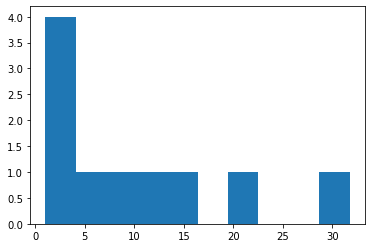

In [47]:
plot.hist(mAndV['Means'])
plot.show()

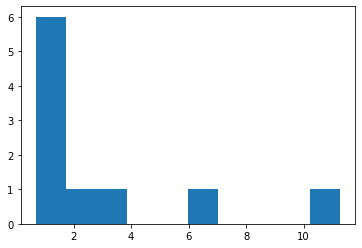

In [48]:
plot.hist(mAndV['Variances'])
plot.show()

In [50]:
# The histograms of the means and variances of the datasets have the same shape, 
#      just with different x and y axis scales and variables

# Question 5

## Part A

In [83]:
contingency = pd.DataFrame(columns = ['low', 'medium', 'high'])
contingency.loc[len(contingency)] = [213, 203, 182]
contingency.loc[len(contingency)] = [138, 110, 154]

contingency

,low,medium,high
0,213,203,182
1,138,110,154


In [84]:
contingencyResults = stats.chi2_contingency(contingency)
contingencyResults

(7.878211595034106,
 0.019465613164995288,
 2,
 array([[209.898, 187.174, 200.928],
        [141.102, 125.826, 135.072]]))

In [85]:
table = pd.DataFrame(contingencyResults[3])
table

,0,1,2
0,209.898,187.174,200.928
1,141.102,125.826,135.072


In [86]:
table.loc[2] = [351, 313, 336]
table['sub-sum'] = [598, 402, 1000]
table.columns = ['low', 'medium', 'high', 'sub-sum']
table[''] = ['For', 'Against', 'sub-sum']
table.set_index('', inplace = True)
table

,low,medium,high,sub-sum
,,,,
For,209.898,187.174,200.928,598
Against,141.102,125.826,135.072,402
sub-sum,351.000,313.000,336.000,1000


In [87]:
chiSq = contingencyResults[0]
critical = contingencyResults[1]
df = contingencyResults[2]

print('Chi Square Value: {0}'.format(chiSq))
print('Degrees of Freedom: {0}'.format(df))
print('Critical Value: {0}'.format(critical))

Chi Square Value: 7.878211595034106
Degrees of Freedom: 2
Critical Value: 0.019465613164995288


In [88]:
# From the critical value, wee can conclude that the two variables are significant at 
#       a significance level of 5%. This is because the critical value is 0.01, which
#       is smaller than the significancee level

## Part B

In [90]:
tableTwo = pd.DataFrame(columns = ['synonymous', 'non-synonymous', ''])
tableTwo.loc[0] = [43, 5, 'polymorphisms']
tableTwo.loc[1] = [17, 7, 'fixed']
tableTwo.set_index('', inplace = True)

tableTwo

,synonomous,non-synonomous
,,
polymorphisms,43,5
fixed,17,7


In [91]:
chiResults = stats.chi2_contingency(tableTwo)
fisherResults = stats.fisher_exact(tableTwo)

In [92]:
chiResults

(2.8125,
 0.09353251268909288,
 1,
 array([[40.,  8.],
        [20.,  4.]]))

In [93]:
fisherResults

(3.541176470588235, 0.08934586721056206)

In [94]:
# From the chi^2 test, we see that the chi^2 values is 2.81 and the p value is 0.09. 
#      From the fisher exact test, we see that the odds ratio is 3.54 and p value is 0.09.
#      With that, using either tests' p-value, the ratio of synonymous to  non-synonymous
#      is statistically the same at a significance level of 0.05, as both of their
#      p-values are 0.09, which is larger than the alpha level of 0.05. In this scenario, 
#      we should use the fisher exact test results, as the fisher exact test is used for 
#      small samples, particularly when at least one of the cells has an expected value
#      that is less than 5, which the bottom right (fixed, non-synonymous) is at the 
#      expected value is 4